# Part 1: Gradient Descent

In this lab we will implement some of the optimisation methods we learned in the lecture. First, we will start by revisiting gradient descent for linear regression. However, in this implementation we will observe how the model parameters are updated over iterations of the gradient descent algorithm. 

Let's start by implementing gradient descent on a simple linear regression dataset, like the one you generated in Lab 1, but this time shifted so that it ranges from -5 to 5.

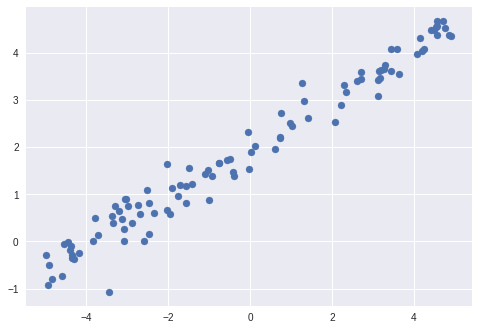

Theta torch.Size([2, 1])
X torch.Size([100, 2])
Y torch.Size([100, 1])


In [21]:
import torch
import matplotlib.pyplot as plt
import random

## generate M data points roughly forming a line (noise added)
M = 100
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0


y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

## visualise the data by plotting it
plt.scatter(X[:,0].numpy(), y.numpy())
plt.show()

print('Theta', theta_true.size())
print('X', X.size())
print('Y', y.size())



You should now have data points according to y = mx + b where m = theta_true[0,0] and b = theta_true[1,0]. Note, $m = \theta_1$ and $b = \theta_0$.

Now, let's implement gradient descent using the Mean Squared Error (MSE) cost function. 

Recall that: 

$J(\theta) = \frac{1}{2 M} \sum_{i = 1}^M (h_{\theta} (x^{(i)}) - y^{(i)} )^2$

for $i = 1 \text{  to iters (or until convergence)}$ <br>

$\hspace{1cm} w_i \leftarrow w_i - \eta \frac{\partial J}{\partial w_i}$

Implement the functions below in order to plot the cost function as well as the weight updates over iterations of gradient descent.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## hypothesis computes $h_theta$
def hypothesis(theta, X):
    return X@theta


def grad_cost_func(theta, X, y): 
  m = list(y.size())[0]
  grad = X.t() @ (hypothesis(theta, X) - y) / m
  return grad
    

## cost_func computes the cost function J
def cost_func(theta, X, y): 
  num_thetas = list(theta.size())[1]
  J = torch.zeros(num_thetas)
  y_size = list(y.size())[0]
  for i in range(num_thetas):
    MSE = hypothesis(theta[:,i:i+1], X) - y
    MSE = MSE ** 2
    MSE = torch.sum(MSE)
    J[i] = MSE / (2*y_size)
  return J



Now let's plot the updates to see what is happening as we iterate over the algorithm. First, we will plot $J$ as a function of $\theta_1$ as well as the resulting equation of the line learned over $N=5$ iterations. Once your code is working, modify the value of $\eta$ to see how it affects convergence.

The figure below illustrates what you're aiming to plot. Note, much of the code to generate the figures is given below, you mostly need to complete the 3 functions above and then fill in a few missing lines of code below.

<img src="http://comp6248.ecs.soton.ac.uk/labs/lab3/Figure1.png">

### First generate the figure on the left hand side. This plot shows the data and the linear fit of the data as the model parameters change over the 5 iterations.

torch.Size([100, 2]) torch.Size([100])


Text(0.5, 1.0, 'Data and fit')

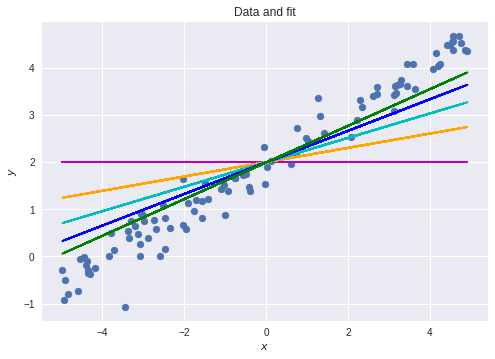

In [27]:
## Now we can plot the lines over iterations
## To do this, we start by constructing a grid of parameter pairs and their corresponding cost function values. 
x_axis = np.linspace(-1,1,100)
theta_grid = torch.Tensor(len(x_axis),2)
theta_grid[:,0] = torch.from_numpy(x_axis)
theta_grid[:,1] = 2.0


J_grid = cost_func(theta_grid.t(), X, y)

print(theta_grid.size(), J_grid.size())

N = 5
eta = 0.03

theta_0 = torch.Tensor([[0.0], [2.0]]) #initialise 
J_t = torch.Tensor(1,N)
theta = torch.Tensor(2,1,N)
J_t[:,0] = cost_func(theta_0, X, y)[0]
theta[:,:,0] = theta_0

for j in range(1,N):
    last_theta = theta[:,:,j-1]
    ## Compute the value of this_theta
    this_theta = last_theta - eta * grad_cost_func(last_theta, X, y)      
    #raise NotImplementedError()
    theta[:,:,j] = this_theta
    J_t[:,j] = cost_func(this_theta,X,y)[0]

    
colors = ['b', 'g', 'm', 'c', 'orange']

## Plot the data 
# YOUR CODE HERE
plt.scatter(X[:,0].numpy(), y.numpy())
new_X = X[:,0].numpy()
random.shuffle(colors)
for (i, color) in zip(range (0,N), colors):
  new_y = list(theta[:,:,i].t())[0][0].item() * new_X + list(theta[:,:,i].t())[0][1].item()
  plt.plot(new_X, new_y, color)
#raise NotImplementedError()

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data and fit')

### Next, generate the plots on the right hand side. This figure is a plot of the cost function over the value of $\theta_1$ as well as the updates of $\theta_1$ over iterations.

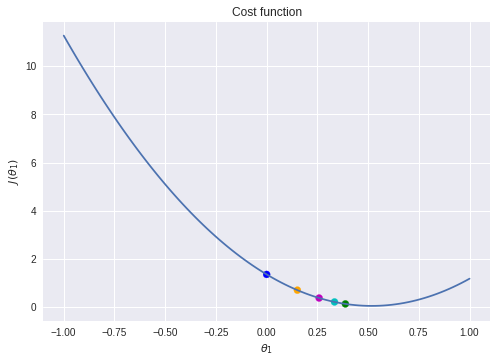

In [24]:

plt.plot(theta_grid[:,0:1].numpy(), J_grid.numpy())
colors = ['b', 'g', 'm', 'c', 'orange']
random. shuffle(colors)

plt.scatter(theta[0].numpy(),J_t.numpy(), color = colors)


#raise NotImplementedError()
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Cost function')
plt.show()

### Finally, generate a contour plot of the cost function

<a list of 17 text.Text objects>

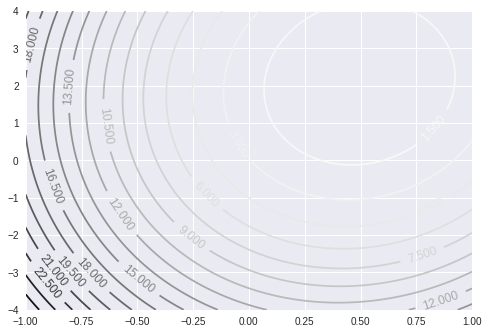

In [25]:
import numpy as np
## Generate a grid of values for theta_0 and theta_1 and compute the cost function for every combination.

theta_0_vals = np.linspace(-1.0,1,100)
theta_1_vals = np.linspace(-4.0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)

J = np.zeros((100,100))
for i, theta_0 in enumerate(theta_0_vals):
  for j, theta_1 in enumerate(theta_1_vals):
    thetas = torch.tensor([[theta_0],[ theta_1]])
# Compute the cost function over every combination of values for theta in a variable called J which will then be plot below
    J[i,j] = cost_func(thetas, X,y)
 

xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
contours = plt.contour(xc, yc, J, 20)
plt.clabel(contours)